In [1]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
sys.path.append(os.path.abspath('.')) #for current preprocessing
# %load_ext autoreload
# %autoreload 2 # changes in script will be immediately applied

import preprocessing_all_data_v03_1 as pad


os.chdir(pad.working_dir())

Populating the interactive namespace from numpy and matplotlib


# Вызов генерации фич

In [2]:
# перечислил все категории, по которым можно сплитовать

categorical_hierahies = [['State', 'Town', u'Agencia_ID'],
                         [ u'Canal_ID'],
                         [u'Ruta_SAK'], 
                         [u'Cliente_ID'], 
                         ['brand', u'Producto_ID']]

In [3]:
reload(pad)

data = pad.preproc(states=['QUERETARO'])
data.head()

file was splitted into 6 parts by product
1 parts of lags were calculated
2 parts of lags were calculated
3 parts of lags were calculated
4 parts of lags were calculated
5 parts of lags were calculated
6 parts of lags were calculated
Current week features deleted


,Agencia_ID,Canal_ID,Cliente_ID,Producto_ID,Ruta_SAK,Semana,State,Town,brand,weight,...,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK_6mean_5,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_6mean_5,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_6mean_5,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_6mean_5,Log_Demanda_Mean_Producto_ID_Ruta_SAK_6mean_5,No_remains_Mean_Producto_ID_Ruta_SAK_6mean_5,Log_Demanda_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_6mean_5,No_remains_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_6mean_5,Log_Demanda_Mean_Producto_ID_Cliente_ID_Town_6mean_5,No_remains_Mean_Producto_ID_Cliente_ID_Town_6mean_5
0,2059,7,237195,202,3301,3,QUERETARO,2059 QUERETARO BALVANERA,35,976.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2059,7,237195,1150,3301,3,QUERETARO,2059 QUERETARO BALVANERA,3,340.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2059,7,240250,202,3301,3,QUERETARO,2059 QUERETARO BALVANERA,35,976.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2059,7,249114,202,3301,3,QUERETARO,2059 QUERETARO BALVANERA,35,976.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2059,7,582091,202,3301,3,QUERETARO,2059 QUERETARO BALVANERA,35,976.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cur_week_features = [u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered', 'Log_Dev_proxima', 'Log_Dev_uni_proxima', 'Log_Venta_hoy']
cur_week_features = [x for x in cur_week_features if x in data.columns]
means_by_split = [x for x in data.columns if '_Mean_' in x and x[-2] != '_'] #its mean, its not a lag

data_for_model = data.drop(cur_week_features + means_by_split, axis=1).set_index(u'Semana')
print('Drop', str(cur_week_features+ means_by_split))

X_train = data_for_model.loc[list(range(3,8)),:].drop('Log_Demanda', axis=1)
y_train = data_for_model.loc[list(range(3,8)),:]['Log_Demanda']
X_test = data_for_model.loc[list(range(8,10)),:].drop('Log_Demanda', axis=1)
y_test = data_for_model.loc[list(range(8,10)),:]['Log_Demanda']
X_train.head()

Drop [u'Town', u'State']


,Agencia_ID,Canal_ID,Cliente_ID,Producto_ID,Ruta_SAK,brand,weight,pieces,Demanda_uni_equil_3mean,Demanda_uni_equil_1,...,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK_6mean_5,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_6mean_5,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_6mean_5,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_6mean_5,Log_Demanda_Mean_Producto_ID_Ruta_SAK_6mean_5,No_remains_Mean_Producto_ID_Ruta_SAK_6mean_5,Log_Demanda_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_6mean_5,No_remains_Mean_brand_Cliente_ID_Ruta_SAK_Agencia_ID_6mean_5,Log_Demanda_Mean_Producto_ID_Cliente_ID_Town_6mean_5,No_remains_Mean_Producto_ID_Cliente_ID_Town_6mean_5
Semana,,,,,,,,,,,,,,,,,,,,,
3,2059,7,237195,202,3301,35,976.0,12.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2059,7,237195,1150,3301,3,340.0,8.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2059,7,240250,202,3301,35,976.0,12.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2059,7,249114,202,3301,35,976.0,12.0,73.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2059,7,582091,202,3301,35,976.0,12.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
features_1_lag = [x for x in X_train.columns if x[-2:] == '_1']
X_train2 = X_train.drop(features_1_lag, axis=1)
X_test2 = X_test.drop(features_1_lag, axis=1)
X_train2.shape, X_train.shape

((212341, 665), (212341, 829))

In [19]:
X_eval = data_for_model.loc[list(range(10,12)),:].drop('Log_Demanda', axis=1)
X_eval2 = X_eval.drop(features_1_lag, axis=1)

In [6]:
(~X_test.isnull()).sum().sort_values()

Dev_proxima_by_uni_5                                                               453
Dev_proxima_by_uni_4mean_5                                                         486
Dev_proxima_by_uni_3mean_5                                                         486
Dev_proxima_by_uni_5mean_5                                                         486
Dev_proxima_by_uni_6mean_5                                                         486
Dev_proxima_by_uni_4                                                               814
Dev_proxima_by_uni_1                                                               882
Dev_proxima_by_uni_3                                                               942
Dev_proxima_by_uni_2                                                              1057
Dev_proxima_by_uni_6mean_4                                                        1060
Dev_proxima_by_uni_3mean_4                                                        1060
Dev_proxima_by_uni_5mean_4                 

# xgboost

In [7]:
import xgboost as xgb
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

# param = clf.best_params_
param = {
 'learning_rate': 0.3,
 'gamma': 1,
 'max_depth': 16,
 'min_child_weight': 18,
 'n_estimators': 5,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'nthread':-1
}

xgb_model = xgb.XGBRegressor()
xgb_model.set_params(**param)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=1, learning_rate=0.3, max_delta_step=0, max_depth=16,
       min_child_weight=18, missing=None, n_estimators=5, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [8]:
# param = clf.best_params_
param = {
 'learning_rate': 0.3,
 'gamma': 1,
 'max_depth': 16,
 'min_child_weight': 18,
 'n_estimators': 5,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'nthread':-1
}

xgb_model2 = xgb.XGBRegressor()
xgb_model2.set_params(**param)

xgb_model2.fit(X_train2, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=1, learning_rate=0.3, max_delta_step=0, max_depth=16,
       min_child_weight=18, missing=None, n_estimators=5, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

Train: 0.23927676842
Test whole set: 0.318752173554
Test 8 week: 0.283779771847
Test 9 week: 0.353078918283


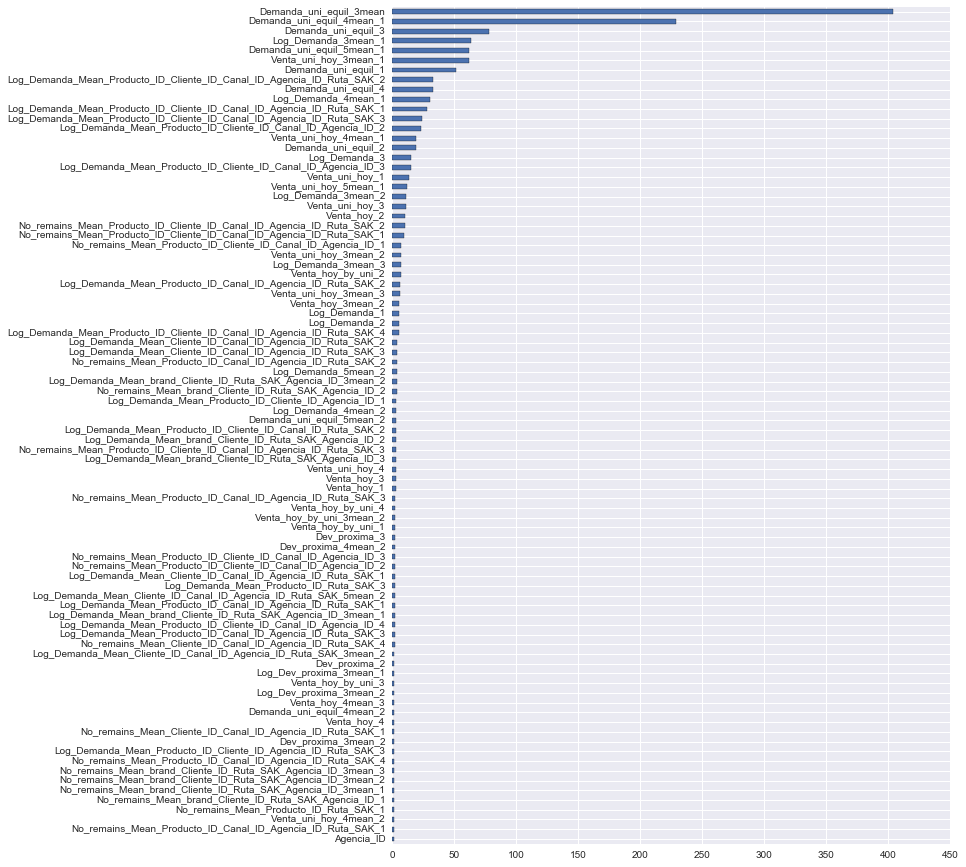

In [20]:
feat_imp = pd.Series(xgb_model.booster().get_fscore()).sort_values()
feat_imp.head(100).plot.barh(figsize=(10,15))

print('Train:', np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train))))
preds = pd.Series(xgb_model.predict(X_test.loc[8]), index=X_test.loc[8])
preds2 = pd.Series(xgb_model2.predict(X_test2.loc[9]), index=X_test2.loc[9])
print('Test whole set:', np.sqrt(mean_squared_error(y_test.loc[[8,9]], np.concatenate([preds, preds2]))))
print('Test 8 week:', np.sqrt(mean_squared_error(y_test.loc[8], preds)))
print('Test 9 week:', np.sqrt(mean_squared_error(y_test.loc[9], preds2)))

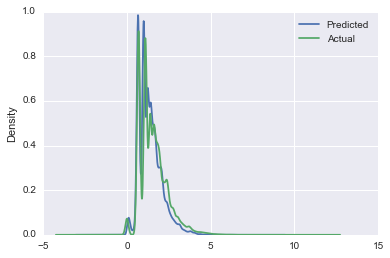

In [22]:
preds.plot.kde()
y_test.loc[8].plot.kde()
plt.legend(['Predicted', 'Actual'])

In [36]:
new_client_ids = set(X_test.Cliente_ID.unique()).difference(X_train.Cliente_ID.unique())
len(new_client_ids), list(new_client_ids)[:5]

(149, [4559969, 4741142, 4679703, 1525786, 4742666])

8 week with new Client: 0.226882475714
8 week with old Client: 0.284215697322


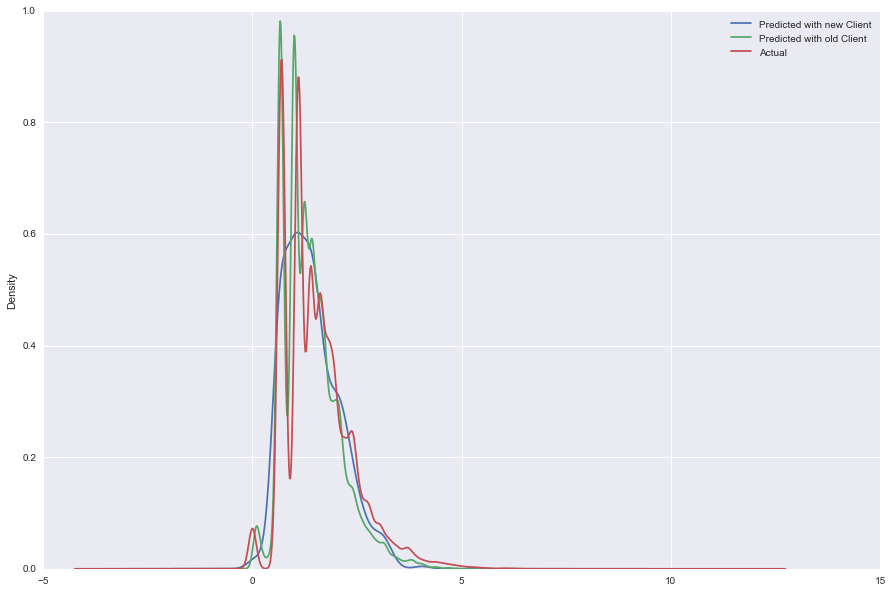

In [43]:
preds.loc[X_test.loc[8].Cliente_ID.isin(new_client_ids).values].plot.kde(figsize = (15,10))
print('8 week with new Client:', np.sqrt(mean_squared_error(
                    y_test.loc[8].loc[X_test.loc[8].Cliente_ID.isin(new_client_ids).values], 
                    preds.loc[X_test.loc[8].Cliente_ID.isin(new_client_ids).values])))
print('8 week with old Client:', np.sqrt(mean_squared_error(
                    y_test.loc[8].loc[~X_test.loc[8].Cliente_ID.isin(new_client_ids).values], 
                    preds.loc[~X_test.loc[8].Cliente_ID.isin(new_client_ids).values])))
preds.loc[~X_test.loc[8].Cliente_ID.isin(new_client_ids).values].plot.kde()
y_test.loc[8].plot.kde()
plt.legend(['Predicted with new Client', 'Predicted with old Client', 'Actual'])

Ошибка растет у предсказания для новых клиентов, но все еще очень маленькая

Посмотрим на то, какие из трансформаций оказались хорошими

In [15]:
def transformaton_types(feat_list):
    features = pd.DataFrame(feat_list, columns = ['Features'])
    features['Original'] = features['Features']
    features['LagWidth'] = features['Features'].str.extract('(\d)mean', expand=True)
    features['Original'] = features['Original'].str.replace('_(\d)mean', '')
    features['Lag'] = features['Original'].str.extract('_(\d)', expand=True)
    features['Original'] = features['Original'].str.replace('_(\d)', '')
    features['Split'] = features['Original'].apply(lambda f: f.split('_Mean_')[1] if '_Mean_' in f else np.nan)
    features['Original'] = features['Original'].apply(lambda f: f.split('_Mean_')[0])
    return features


features = transformaton_types(feat_imp.index)
features['Important'] = features['Features'].isin(feat_imp.head(50).index).astype(int)
features

,Features,Original,LagWidth,Lag,Split,Important
0,Agencia_ID,Agencia_ID,NaN,NaN,NaN,1
1,No_remains_Mean_Producto_ID_Canal_ID_Agencia_I...,No_remains,NaN,1,Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK,1
2,Venta_uni_hoy_4mean_2,Venta_uni_hoy,4,2,NaN,1
3,No_remains_Mean_Producto_ID_Ruta_SAK_1,No_remains,NaN,1,Producto_ID_Ruta_SAK,1
4,No_remains_Mean_brand_Cliente_ID_Ruta_SAK_Agen...,No_remains,NaN,1,brand_Cliente_ID_Ruta_SAK_Agencia_ID,1
5,No_remains_Mean_brand_Cliente_ID_Ruta_SAK_Agen...,No_remains,3,1,brand_Cliente_ID_Ruta_SAK_Agencia_ID,1
6,No_remains_Mean_brand_Cliente_ID_Ruta_SAK_Agen...,No_remains,3,2,brand_Cliente_ID_Ruta_SAK_Agencia_ID,1
7,No_remains_Mean_brand_Cliente_ID_Ruta_SAK_Agen...,No_remains,3,3,brand_Cliente_ID_Ruta_SAK_Agencia_ID,1
8,No_remains_Mean_Producto_ID_Canal_ID_Agencia_I...,No_remains,NaN,4,Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK,1
9,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agenci...,Log_Demanda,NaN,3,Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK,1


Хорошими (важными) назовем топ-50 фич

In [16]:
print('По сплитам')
pd.crosstab(features.Split, features.Important)

По сплитам


Important,0,1
Split,,
Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK,2,5
Producto_ID_Canal_ID_Agencia_ID_Ruta_SAK,1,6
Producto_ID_Cliente_ID_Agencia_ID,0,1
Producto_ID_Cliente_ID_Agencia_ID_Ruta_SAK,0,1
Producto_ID_Cliente_ID_Canal_ID_Agencia_ID,3,3
Producto_ID_Cliente_ID_Canal_ID_Agencia_ID_Ruta_SAK,6,1
Producto_ID_Cliente_ID_Canal_ID_Ruta_SAK,0,1
Producto_ID_Ruta_SAK,0,2
brand_Cliente_ID_Ruta_SAK_Agencia_ID,0,9


In [17]:
print('По лагам: узким (на 1 неделю) и широким (n предыдущих)')
pd.crosstab(features.Lag.astype(str), features.LagWidth.astype(str), features.Important, aggfunc='mean')

По лагам: узким (на 1 неделю) и широким (n предыдущих)


LagWidth,3,4,5,nan
Lag,,,,
1,0.600000,0.0,0.0,0.600
2,0.666667,1.0,1.0,0.400
3,0.333333,1.0,NaN,0.625
4,NaN,NaN,NaN,0.750
nan,0.000000,NaN,NaN,1.000


In [18]:
print('По изначальным фичам')
originals = pd.crosstab(features.Original, features.Important)
originals['Share'] = originals[1]/originals.sum(1)
originals = originals.sort_values(['Share', 0], ascending=[True, False])
originals

По изначальным фичам


Important,0,1,Share
Original,,,
Demanda_uni_equil,7,2,0.222222
Venta_uni_hoy,7,2,0.222222
Log_Demanda,16,16,0.500000
Venta_hoy,2,4,0.666667
Venta_hoy_by_uni,1,4,0.800000
No_remains,3,15,0.833333
Agencia_ID,0,1,1.000000
Dev_proxima,0,4,1.000000
Log_Dev_proxima,0,2,1.000000


# Распределение объемов для 10-11 недели

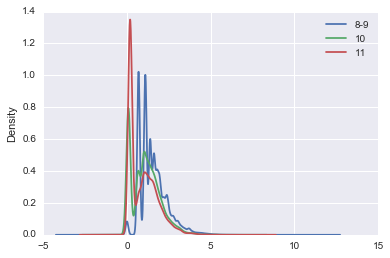

In [25]:
y_eval10 = pd.Series(xgb_model.predict(X_eval.loc[10]), index=X_eval.loc[10].index)
y_eval11 = pd.Series(xgb_model2.predict(X_eval2.loc[11]), index=X_eval.loc[11].index)

y_test.loc[[8,9]].plot.kde()
y_eval10.plot.kde()
y_eval11.plot.kde()
plt.legend(['8-9', '10', '11'])

То есть мы предсказываем очень много нулей для 11 недели